# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, ShuffleSplit, GridSearchCV, RandomizedSearchCV, train_test_split, learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [3]:
Headers = ["RI" , "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
Data = pd.read_csv('glass.data', delimiter = ',', names = Headers)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [ ]:
#Data.shape

In [ ]:
# RI is refractive index, Na is Sodium, Mg is Magnesium, Al is Aluminum, Si is Silicon, K is Potassium, Ca is Calcium, Ba is Barium, and Fe is Iron. 
# Type would present the 6 different types of glass in the database including: 1) float processed building windows, 
# 2) non float processed building windows, 3) float processed vehicle windows, 5) containers, 6) tableware, 7) headlamps.

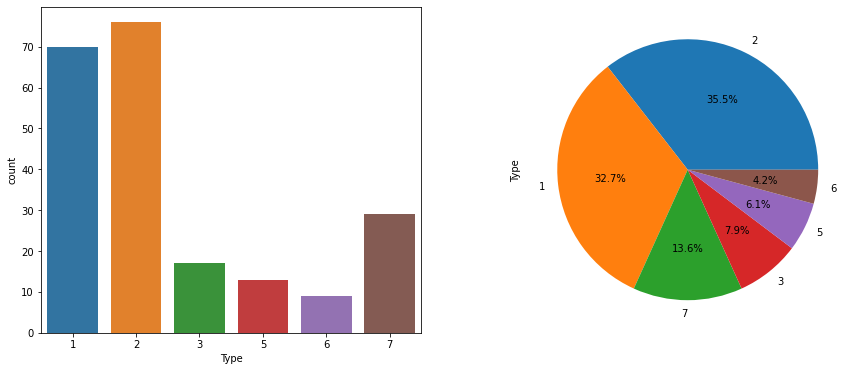

In [5]:
import seaborn as sns
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x=Data.iloc[:, -1], data=Data, ax=ax[0])
_ = Data.iloc[:, -1].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

In [ ]:
plt.figure()
mpl.rcParams['axes.linewidth'] = 6 #set the value globally
mpl.rcParams['legend.fontsize'] = 40 #set the value globally
Axes = Data.plot(kind='density',lw=6, subplots=True, layout=(5,2),figsize=(40, 30),
                 sharex = False ,sharey=False, legend=True , colormap = "viridis")
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 35) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 35) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'size', 45) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', 45) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'weight', 'bold') for item in Axes.ravel()]
plt.show()

In [6]:
X = Data.iloc[:, 0:9]
Y = Data.iloc[:, -1]
X_scaled = scale(X)
#Y = y.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y,train_size=0.75, test_size=0.25, random_state=666)

## Define learning curve

In [113]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## Decision Tree

In [7]:
# default model
DT = DecisionTreeClassifier(random_state=6666)
DT = DT.fit(X_train,y_train)
cv_score= cross_val_score(DT,X_train,y_train,cv=5).mean()
test_score = DT.score(X_test,y_test)
print(cv_score, test_score)

0.70625 0.6666666666666666


In [9]:
# random search 
param_dist = {"max_depth":[*range(1,15)],
        "splitter":("best","random"),
        "criterion":("gini","entropy"),
        "min_samples_leaf":[*range(1,15)],
        "min_samples_split":[*range(2,15)]
       }
n_iter_search = 300
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=6666)
random_search = RandomizedSearchCV(DT, param_distributions=param_dist, cv=cv,n_iter=n_iter_search, random_state=666)
from time import time
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
best_estimator_DT = random_search.best_estimator_
print(best_estimator_DT)
print(random_search.best_score_)

RandomizedSearchCV took 2.40 seconds for 300 candidates parameter settings.
DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=12,
                       random_state=6666)
0.75625


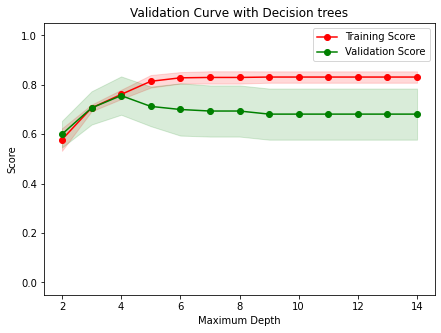

In [11]:
# validation curve
from sklearn.model_selection import validation_curve
# Vary the max_depth parameter from 1 to 15
max_depth = range(2,15)
# random_search decision tree results
DT_randomsearched = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=12,
                       random_state=6666)
# Calculate the training and testing scores
train_scores, test_scores = validation_curve(DT_randomsearched, X_train, y_train, \
    param_name = "max_depth", param_range = max_depth, cv = cv)

# Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with Decision trees')
plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(max_depth, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(max_depth, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
 # Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('Maximum Depth')
plt.ylabel('Score')
plt.ylim([-0.05,1.05])
plt.show()

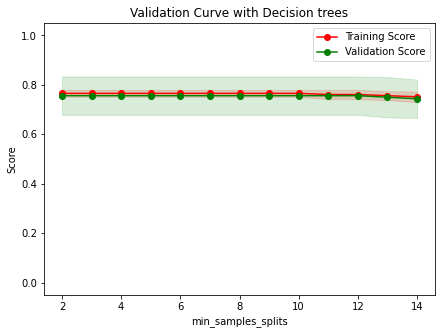

In [14]:
# validation curve
# Vary the min_samples_splits parameter from 1 to 15
min_samples_split = range(2,15)
# random_search decision tree results
DT_maxdepth_tuned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=12,
                       random_state=6666)
# Calculate the training and testing scores
train_scores, test_scores = validation_curve(DT_maxdepth_tuned, X_train, y_train, \
    param_name = "min_samples_split", param_range = min_samples_split, cv = cv)

    # Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with Decision trees')
plt.plot(min_samples_split, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(min_samples_split, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(min_samples_split, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(min_samples_split, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
 # Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('min_samples_splits')
plt.ylabel('Score')
plt.ylim([-0.05,1.05])
plt.show()

In [15]:
DT_finally = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=12,
                       random_state=6666).fit(X_train, y_train)

Text(0.5, 1.0, 'Decision trees')

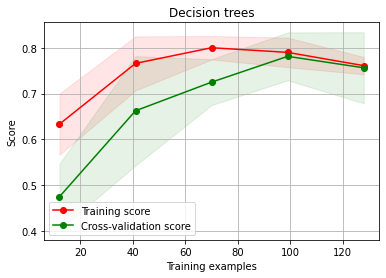

In [16]:
# learning curve
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(DT_finally, X_train, y_train, cv=cv,train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Decision trees")


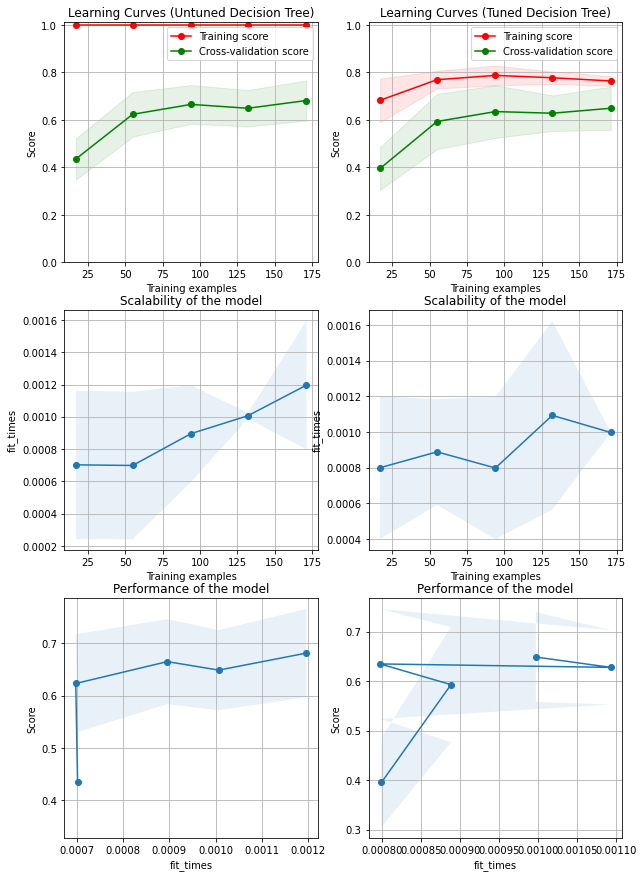

In [20]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Untuned Decision Tree)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=6666)
#estimator = GaussianNB()
plot_learning_curve(DT, title, X_scaled, Y, axes=axes[:, 0], ylim=(0.0, 1.01),cv=cv)

title = r"Learning Curves (Tuned Decision Tree)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
plot_learning_curve(DT_finally, title, X_scaled, Y, axes=axes[:, 1], ylim=(0.0, 1.01),cv=cv)

plt.show()

In [ ]:
#最优参数得分如下，得分有稍稍变高
score2 = GS.score(X_test,y_test)
score2 

## Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
#defalut model
GBC = GradientBoostingClassifier().fit(X_train, y_train)
GBC.score(X_test, y_test)

0.7592592592592593

In [39]:
# Random search hyperparameter tuning
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

n_iter_search = 300
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=6666)
random_search = RandomizedSearchCV(GBC, param_distributions=parameters, cv=cv,n_iter=n_iter_search, random_state=666)
from time import time
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
best_estimator_GBC= random_search.best_estimator_
print(best_estimator_GBC)
print(random_search.best_score_)

D:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 100 is smaller than n_iter=300. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV took 679.83 seconds for 300 candidates parameter settings.
GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=50)
0.81875


In [98]:
GBC_finally = GradientBoostingClassifier(max_depth=25).fit(X_train, y_train)

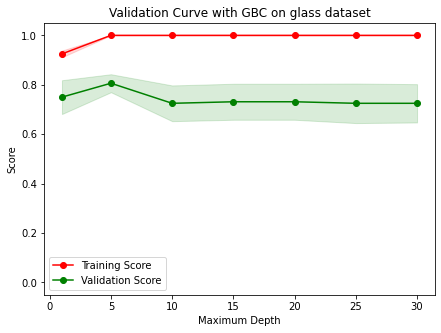

In [101]:
# validation curve
from sklearn.model_selection import validation_curve
# Vary the max_depth parameter from 1 to 15
max_depth = [1,5,10,15,20,25,30]

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(GBC_finally, X_train, y_train, \
    param_name = "max_depth", param_range = max_depth, cv = cv)

# Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with GBC on glass dataset')
plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(max_depth, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(max_depth, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
 # Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('Maximum Depth')
plt.ylabel('Score')
plt.ylim([-0.05,1.05])
plt.show()

Text(0.5, 1.0, 'Gradient Boosting Classifier')

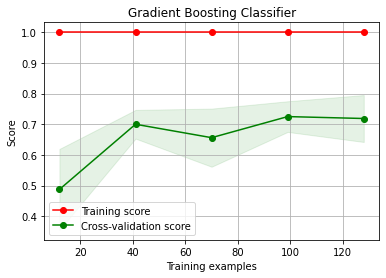

In [99]:
# learning curve
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(GBC_finally, X_train, y_train, cv=cv,train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Gradient Boosting Classifier")

## knn

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.6666666666666666

[[1.        1.        1.        1.        1.       ]
 [0.8203125 0.828125  0.828125  0.8203125 0.796875 ]
 [0.7890625 0.796875  0.8046875 0.7890625 0.8046875]
 [0.765625  0.7421875 0.703125  0.7265625 0.75     ]
 [0.7109375 0.6796875 0.7109375 0.7109375 0.734375 ]
 [0.6875    0.6875    0.6875    0.71875   0.703125 ]
 [0.703125  0.6796875 0.6953125 0.7109375 0.71875  ]
 [0.671875  0.6796875 0.6796875 0.6796875 0.671875 ]
 [0.6640625 0.671875  0.6640625 0.6484375 0.6796875]
 [0.6640625 0.65625   0.6171875 0.6484375 0.671875 ]
 [0.6171875 0.65625   0.5859375 0.625     0.65625  ]
 [0.6328125 0.640625  0.609375  0.6171875 0.6328125]
 [0.625     0.6328125 0.59375   0.6015625 0.6484375]
 [0.625     0.6015625 0.609375  0.609375  0.5859375]
 [0.6328125 0.625     0.6328125 0.578125  0.5859375]
 [0.640625  0.640625  0.609375  0.5703125 0.6015625]
 [0.6328125 0.625     0.609375  0.5703125 0.6171875]
 [0.6484375 0.625     0.625     0.578125  0.625    ]
 [0.625     0.609375  0.609375  0.59375   0.62

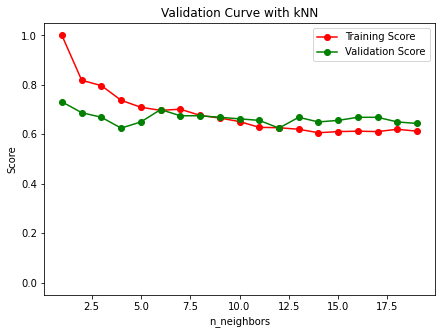

In [107]:
# validation curve
# Vary the max_depth parameter from 1 to 15
n_neighbors = range(1,20)
# random_search decision tree results
#KNN_randomsearched = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=8, weights='distance')
# Calculate the training and testing scores
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, \
    param_name = "n_neighbors", param_range = n_neighbors, cv = cv)
print(train_scores)
# Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with kNN')
plt.plot(n_neighbors, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(n_neighbors, test_mean, 'o-', color = 'g', label = 'Validation Score')
# plt.fill_between(max_depth, train_mean - train_std, \
#     train_mean + train_std, alpha = 0.15, color = 'r')
# plt.fill_between(max_depth, test_mean - test_std, \
#     test_mean + test_std, alpha = 0.15, color = 'g')
    
 # Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.ylim([-0.05,1.05])
plt.show()

Text(0.5, 1.0, 'kNN Classifier on glass data')

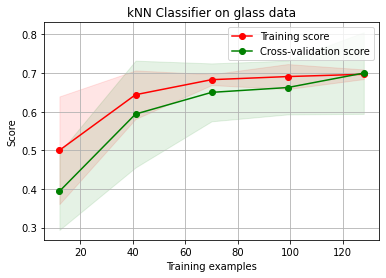

In [110]:
# learning curve
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(KNeighborsClassifier(n_neighbors=6), X_train, y_train, cv=cv,train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("kNN Classifier on glass data")

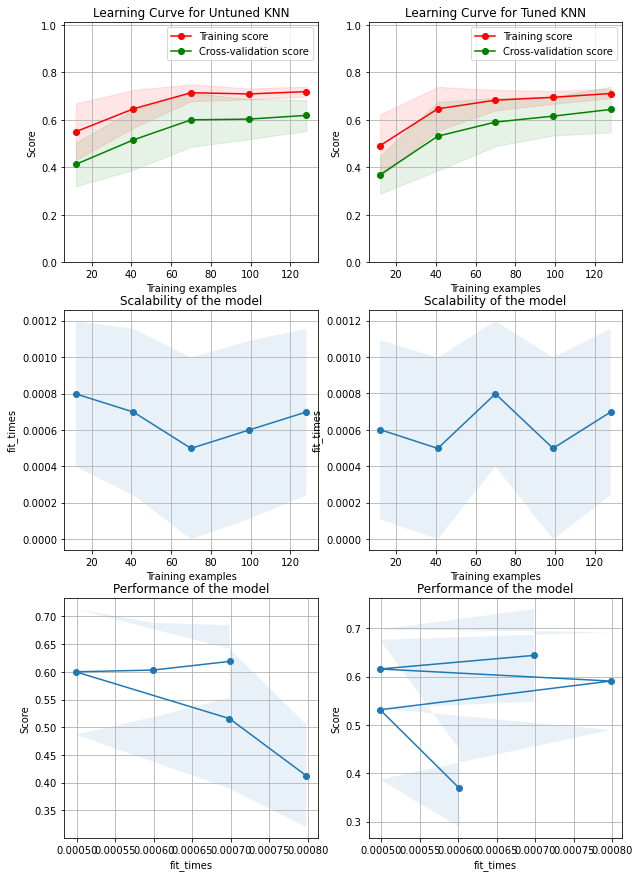

In [111]:
#learning curves
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curve for Untuned KNN"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=6666)
#estimator = GaussianNB()
plot_learning_curve(KNeighborsClassifier(), title, X_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01),cv=cv)

title = r"Learning Curve for Tuned KNN"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
plot_learning_curve(KNeighborsClassifier(n_neighbors=6), title, X_train, y_train, axes=axes[:, 1], ylim=(0.0, 1.01),cv=cv)

plt.show()

## SVM

In [49]:
#rbf scores the best
from sklearn import svm
kernels=['linear','poly','rbf','sigmoid']
scores=[]
for i in kernels:
    clf = svm.SVC(kernel = i)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
scores

[0.6296296296296297, 0.5, 0.7222222222222222, 0.5555555555555556]

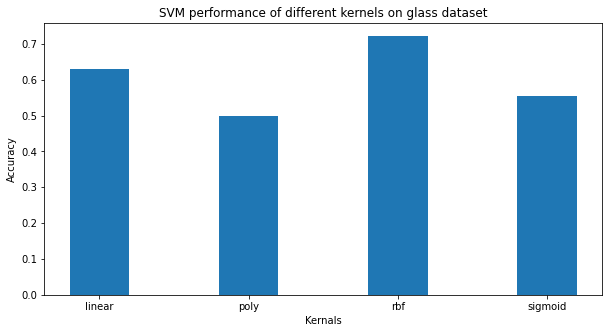

In [52]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(kernels, scores,
        width = 0.4)
 
plt.xlabel("Kernals")
plt.ylabel("Accuracy")
plt.title("SVM performance of different kernels on glass dataset")
plt.show()

In [76]:
# using kernal rbf to do grid search
# defining parameter range
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=0.001, gamma=0.0

In [83]:
print(grid.best_estimator_.score(X_test, y_test))

my_best=SVC(C=0.1, gamma=0.1)
my_best.fit(X_train,y_train)
my_best.score(X_test,y_test)

0.5

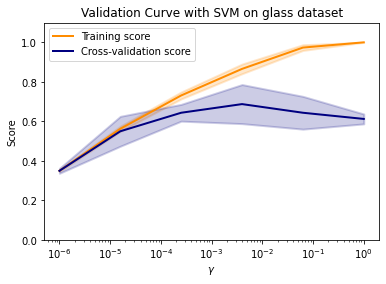

In [86]:
#different gamma
param_range = np.logspace(-6, -0, 6)
SVC_best = SVC(C=1000, gamma=0.01,random_state=6666)
train_scores, test_scores = validation_curve(
    SVC(C=1000), X_train, y_train, param_name="gamma", param_range=param_range,scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM on glass dataset")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

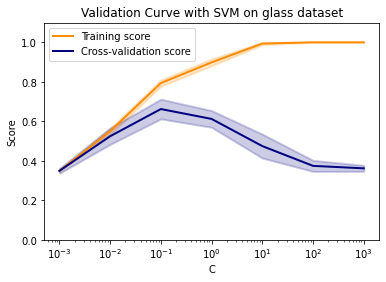

In [72]:
#different C
param_range = np.logspace(-3, 3, 7)
SVC_best = SVC(C=1000, gamma=0.01,random_state=6666)
train_scores, test_scores = validation_curve(
    SVC(), X_train, y_train, param_name="gamma", param_range=param_range,scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM on glass dataset")
plt.xlabel(r"C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'Support Vector Classifier on glass data')

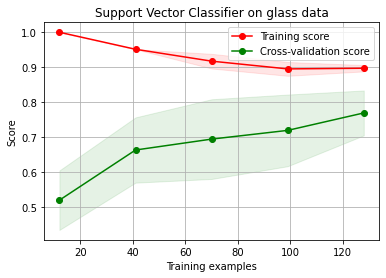

In [85]:
# learning curve
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(SVC_best, X_train, y_train, cv=cv,train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Support Vector Classifier on glass data")

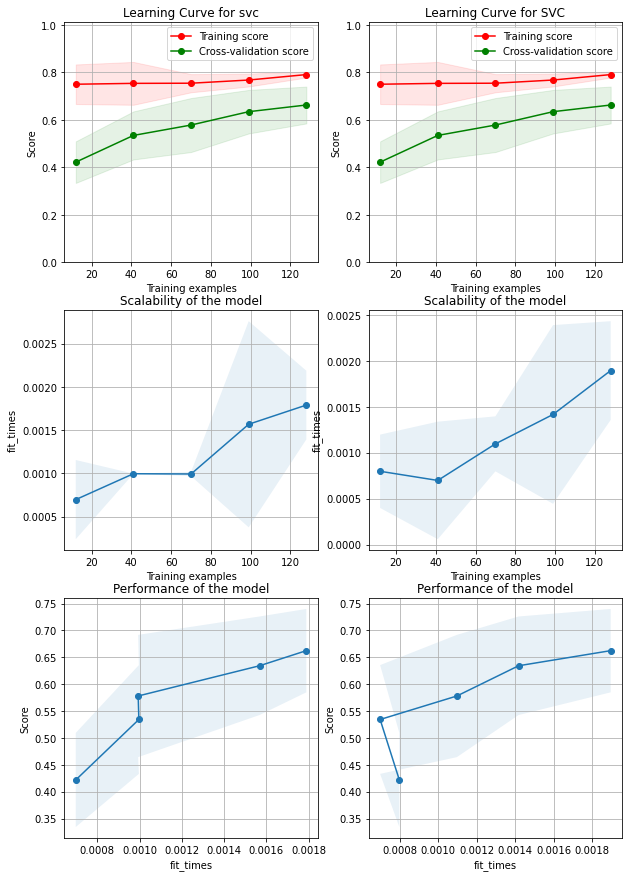

In [119]:
#learning curves
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curve for svc"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=6666)
#estimator = GaussianNB()
plot_learning_curve(SVC(), title, X_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01),cv=cv)

title = r"Learning Curve for SVC"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
plot_learning_curve(SVC(), title, X_train, y_train, axes=axes[:, 1], ylim=(0.0, 1.01),cv=cv)

plt.show()

## Neural Networks

In [21]:
import keras

Using TensorFlow backend.


In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
# Defining a function to encode output column
from keras.utils import to_categorical
def encode(data):
    print('Shape of data (Before Encode):%s'%str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (After Encode):%s\n'%str(data.shape))
    return encoded

In [24]:
y_train_encoded = encode(y_train)

Shape of data (Before Encode):(160,)
Shape of data (After Encode):(160,)



In [25]:
y_test_encoded = encode(y_test)

Shape of data (Before Encode):(54,)
Shape of data (After Encode):(54,)



In [26]:
y_train_encoded = np.delete(y_train_encoded,[0,4],axis = 1)
print(y_train_encoded[2])
y_test_encoded = np.delete(y_test_encoded,[0,4],axis = 1)
print(y_test_encoded[2])

[0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0.]


In [27]:
# Initialize the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded),batch_size = 100, epochs = 1150)

Train on 160 samples, validate on 54 samples
Epoch 1/1150
160/160 [==============================] - 0s 573us/step - loss: 1.7914 - accuracy: 0.3250 - val_loss: 1.7903 - val_accuracy: 0.3148
Epoch 2/1150
160/160 [==============================] - 0s 31us/step - loss: 1.7900 - accuracy: 0.3500 - val_loss: 1.7888 - val_accuracy: 0.3148
Epoch 3/1150
160/160 [==============================] - 0s 87us/step - loss: 1.7885 - accuracy: 0.3500 - val_loss: 1.7873 - val_accuracy: 0.3148
Epoch 4/1150
160/160 [==============================] - 0s 25us/step - loss: 1.7870 - accuracy: 0.3500 - val_loss: 1.7858 - val_accuracy: 0.3519
Epoch 5/1150
160/160 [==============================] - 0s 25us/step - loss: 1.7856 - accuracy: 0.3500 - val_loss: 1.7843 - val_accuracy: 0.3704
Epoch 6/1150
160/160 [==============================] - 0s 25us/step - loss: 1.7841 - accuracy: 0.3500 - val_loss: 1.7828 - val_accuracy: 0.3704
Epoch 7/1150
160/160 [==============================] - 0s 31us/step - loss: 1.7825 

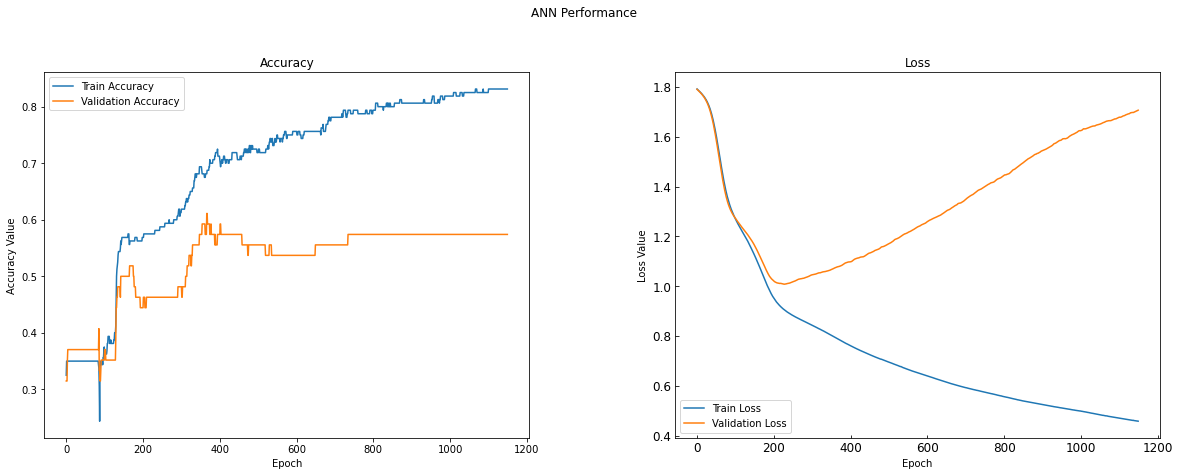

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = f.suptitle('ANN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

#epochs = list(range(1,1151))
ax1.plot(range(1150), history.history['accuracy'], label='Train Accuracy')
ax1.plot(range(1150), history.history['val_accuracy'], label='Validation Accuracy')
plt.tick_params(direction="in", labelsize=12)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(range(1150), history.history['loss'], label='Train Loss')
ax2.plot(range(1150), history.history['val_loss'], label='Validation Loss')
plt.tick_params(direction="in", labelsize=12)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [34]:
# Initialize the ANN
classifier2 = Sequential()

# Adding the input layer and the first hidden layer
classifier2.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier2.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding another hidden layer
classifier2.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier2.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

#Compiling the ANN
classifier2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training set
history2 = classifier2.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded),batch_size = 180, epochs = 1150)

Train on 160 samples, validate on 54 samples
Epoch 1/1150
160/160 [==============================] - 0s 573us/step - loss: 1.7918 - accuracy: 0.1688 - val_loss: 1.7911 - val_accuracy: 0.3148
Epoch 2/1150
160/160 [==============================] - 0s 13us/step - loss: 1.7911 - accuracy: 0.3313 - val_loss: 1.7903 - val_accuracy: 0.3148
Epoch 3/1150
160/160 [==============================] - 0s 12us/step - loss: 1.7904 - accuracy: 0.3313 - val_loss: 1.7896 - val_accuracy: 0.3148
Epoch 4/1150
160/160 [==============================] - 0s 12us/step - loss: 1.7896 - accuracy: 0.3313 - val_loss: 1.7889 - val_accuracy: 0.3148
Epoch 5/1150
160/160 [==============================] - 0s 12us/step - loss: 1.7889 - accuracy: 0.3313 - val_loss: 1.7882 - val_accuracy: 0.3148
Epoch 6/1150
160/160 [==============================] - 0s 12us/step - loss: 1.7882 - accuracy: 0.3313 - val_loss: 1.7875 - val_accuracy: 0.3148
Epoch 7/1150
160/160 [==============================] - 0s 6us/step - loss: 1.7875 -

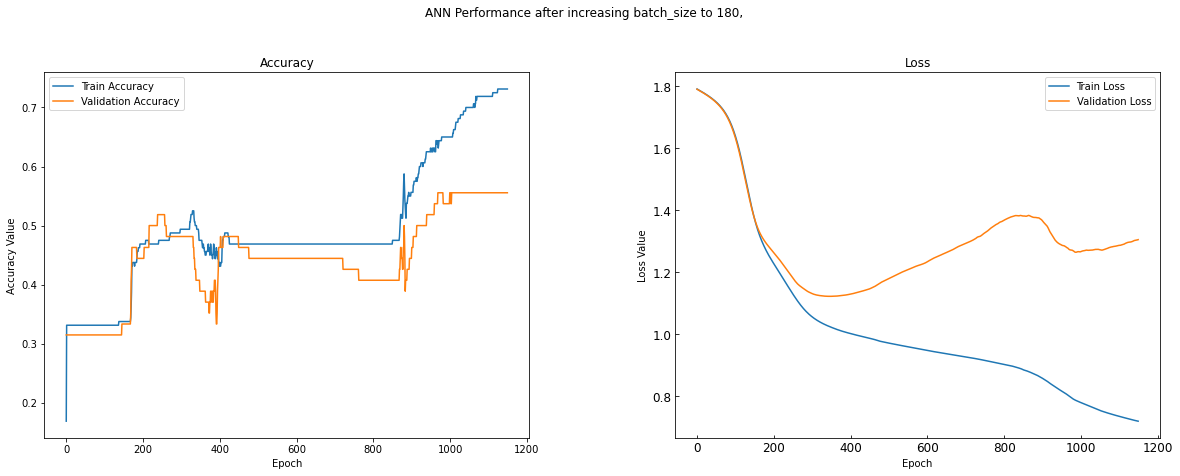

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = f.suptitle('ANN Performance after increasing batch_size to 180,', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

#epochs = list(range(1,1151))
ax1.plot(range(1150), history2.history['accuracy'], label='Train Accuracy')
ax1.plot(range(1150), history2.history['val_accuracy'], label='Validation Accuracy')
plt.tick_params(direction="in", labelsize=12)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(range(1150), history2.history['loss'], label='Train Loss')
ax2.plot(range(1150), history2.history['val_loss'], label='Validation Loss')
plt.tick_params(direction="in", labelsize=12)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")